In [236]:
import requests
import csv
import pandas as pd
import feedparser
import re

In [237]:
file = open("newfeed.csv","w",encoding="utf-8")
writer = csv.writer(file)
writer.writerow(["Title","Date","Description","Link"])
feed = open("FinalUrl.txt","r")
urls = feed.read()
urls = urls.split("\n")

for url in urls:

    try:    
            f = feedparser.parse(url)
    except Exception as e:
            print('Could not parse the xml: ', url)
            print(e)
    for item in f.entries:
        r = re.compile(r"<[^>]*>")
        try:
            items_dicts = {'Title':item.title,'Date':item.published,'Description':r.sub(r"",item.summary),'Link':item.link}
        except:
            item_dicts = {'Title':item.title}
        f = csv.DictWriter(file, items_dicts.keys())
        f.writerow(items_dicts)

In [238]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import yake

In [239]:
df = pd.read_csv("newfeed.csv")

In [240]:
df.dropna(inplace=True)

In [241]:
df.isna().sum()

Title          0
Date           0
Description    0
Link           0
dtype: int64

In [242]:
df

,Title,Date,Description,Link
0,Ben Schneiderman to give talk on “The New ABCs...,"Mon, 11 Apr 2016 16:30:15 +0000","On Thursday, April 21st at 12:30pm, Ben Schnei...",https://cds.nyu.edu/events/%relationship%/ben-...
1,Ben Schneiderman to give talk on “The New ABCs...,"Mon, 11 Apr 2016 16:30:15 +0000","On Thursday, April 21st at 12:30pm, Ben Schnei...",https://cds.nyu.edu/events/%relationship%/ben-...
2,Ben Schneiderman to give talk on “The New ABCs...,"Mon, 11 Apr 2016 16:30:15 +0000","On Thursday, April 21st at 12:30pm, Ben Schnei...",https://cds.nyu.edu/events/%relationship%/ben-...
3,Ben Schneiderman to give talk on “The New ABCs...,"Mon, 11 Apr 2016 16:30:15 +0000","On Thursday, April 21st at 12:30pm, Ben Schnei...",https://cds.nyu.edu/events/%relationship%/ben-...
4,Ben Schneiderman to give talk on “The New ABCs...,"Mon, 11 Apr 2016 16:30:15 +0000","On Thursday, April 21st at 12:30pm, Ben Schnei...",https://cds.nyu.edu/events/%relationship%/ben-...
...,...,...,...,...
1096,Faculty Interview: Dustin Duncan,"Fri, 22 Apr 2016 19:35:01 +0000",Dustin Duncan is an Affiliated Faculty member ...,https://cds.nyu.edu/news/%relationship%/facult...
1097,Data Science Grant Opportunity,"Fri, 15 Apr 2016 22:13:50 +0000",As part of the Moore-Sloan Data Science Enviro...,https://cds.nyu.edu/uncategorized/%relationshi...
1098,CDS Hosts its First Datathon,"Tue, 12 Apr 2016 02:50:07 +0000","At the Center for Data Science, our commitment...",https://cds.nyu.edu/news/%relationship%/cds-ho...
1099,Spring 2016 Career Recap,"Mon, 11 Apr 2016 17:12:13 +0000",One of the most compelling reasons to enter in...,https://cds.nyu.edu/news/%relationship%/spring...


In [243]:
desc_1 = []
for text in df["Description"]:
    desc_1.append(re.sub("\s+"," ",text).lower())

In [244]:
desc_2 = []
for text in desc_1:
    desc_2.append(re.sub("\[.+\]","",text))

In [245]:
desc_3 = []
for text in desc_2:
    desc_3.append(re.sub("&.+;","",text))

In [246]:
desc_4 = []
for text in desc_3:
    desc_4.append(re.sub(r'http\S+', '',text))

In [247]:
clean_desc = []
for text in desc_4:
    clean_desc.append(re.sub(r'[^\w\s]',"",text))

In [249]:
stop_words=set(stopwords.words("english"))
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [250]:
stop_words_2 = []
condition = ['not','nor','no']
for words in stop_words:
    if words not in condition:
        stop_words_2.append(words)

In [251]:
def lemmatize_text(text):
    words = word_tokenize(text)
    words_2 = []
    lemm_2 = ""
    for word in words:
        if word not in stop_words_2:
            words_2.append(word)
    for word in words_2:
        lemm = wnet.lemmatize(word)
        lemm_2+=lemm+" "
    return lemm_2

In [252]:
lemm_desc = ""
for text in clean_desc:
    lemm_desc+=lemmatize_text(text)+" "

In [254]:
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 100

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(lemm_desc)

for kw in keywords:
    print(kw)

('data science', 4.903714917088632e-07)
('machine learning', 1.0669450816494943e-06)
('thursday april', 1.5861427236294529e-06)
('computer science', 1.7073063225226757e-06)
('data blogger', 1.807381345719891e-06)
('science professor', 2.5764050122214292e-06)
('center thursday', 3.47591854663156e-06)
('date thursday', 3.838829551611734e-06)
('give talk', 3.913199953561495e-06)
('data scientist', 4.290716690629833e-06)
('abc research', 4.474951773569565e-06)
('research achieving', 4.474951773569565e-06)
('released book', 4.625258512079178e-06)
('neural network', 4.804571267202334e-06)
('management center', 4.853115771140274e-06)
('professor university', 5.1540359047098635e-06)
('schneiderman computer', 5.256430715619554e-06)
('maryland give', 5.7861333974041206e-06)
('newly released', 5.806428514921017e-06)
('detail abstract', 5.9128863746110204e-06)
('kaufman management', 5.94787625731942e-06)
('university maryland', 6.064753983887416e-06)
('deep learning', 6.1856071264957204e-06)
('blo

In [255]:
kw = pd.DataFrame(keywords,columns=['keywords','tf idf'])

In [256]:
kw

,keywords,tf idf
0,data science,4.903715e-07
1,machine learning,1.066945e-06
2,thursday april,1.586143e-06
3,computer science,1.707306e-06
4,data blogger,1.807381e-06
...,...,...
95,previous post,6.228944e-05
96,artificial intelligence,6.252178e-05
97,blogger python,6.344787e-05
98,talk data,6.407825e-05


In [257]:
import matplotlib.pyplot as plt
%matplotlib inline

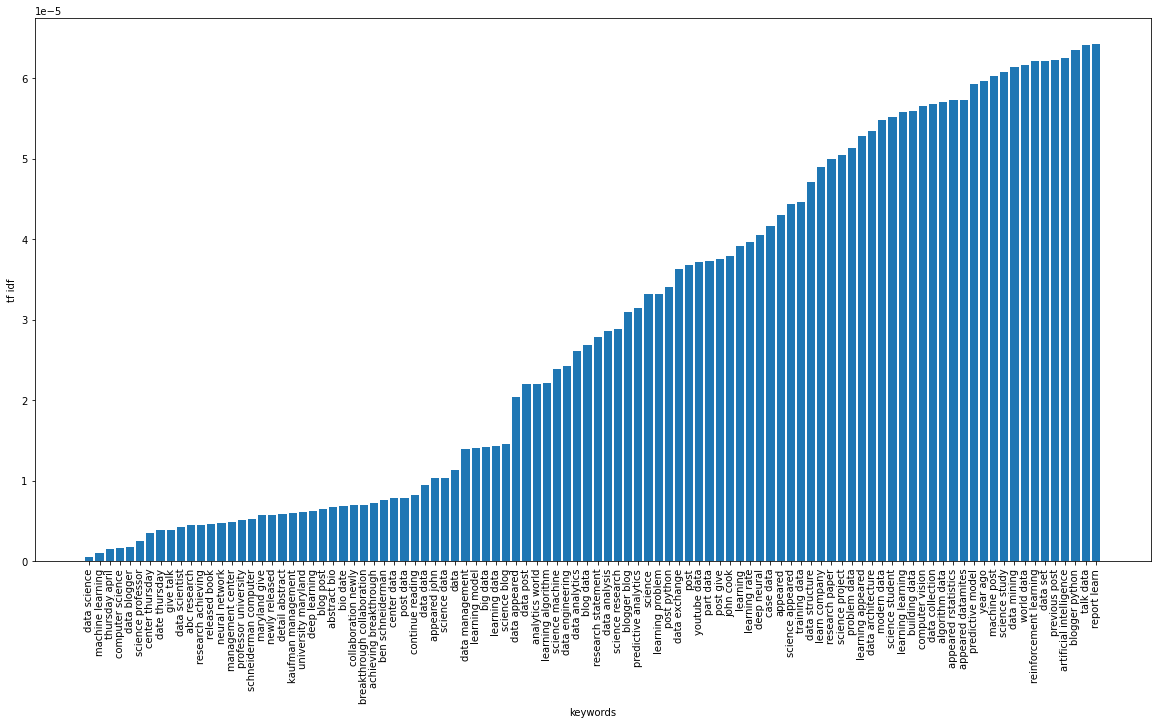

In [258]:
fig ,ax = plt.subplots(figsize=(20,10))
ax.bar(kw['keywords'],kw['tf idf'])
plt.xticks(rotation='vertical')
plt.xlabel('keywords')
plt.ylabel('tf idf');